# Predicting Churn For Telco Company

In this notebook, I will try to use 2 method to predict churn.


1.   Machine Learning Classification Logistic Linear
2.   Deep Learning Sequential



Now, I will import the library that needed to use in this notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



Import the Data

In [ ]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

This is the Data, Using head() to show first 5 columns

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now lets try to look at the information of my Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 21 Columns, with detail as:


1.   float64   : 1
2.   int64     : 1
1.   object    : 18

But the totalcharges is describe as object type so I need to convert it to float later. As all columns has non-null type so we can expect no NaN value in our row.





Using describe to see the statistic table of the data

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The Mean and 50% have small different than each other so I expect that there is no outlier but will try using boxplot to look at the data

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,8327-LZKAS,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


describe object to see the statistic of object type column

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


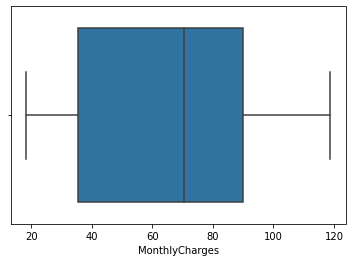

In [ ]:
sns.boxplot(data.MonthlyCharges)

In MonthlyCharges I dont get the outlier in the boxplot.

## Preprocessing The Data

Before processing I will copy the data so I dont modified the real data

In [ ]:
df=data.copy()

In [ ]:
df_unique=df.nunique()
df_unique

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

As I try to change TotalCharges to float type, I got error message, so I will check which row gave me the error

In [ ]:
count=0
try:
    df2=df['TotalCharges']
    for x in df2:
        x=float(x)+1
        count+=1
except:
    print('failed',count)
        

failed 488


I got error at row number 488, now make some modify with the data

In [ ]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x: x.replace(' ','0'))
df['TotalCharges']=df['TotalCharges'].astype(float)

Try to check again

In [ ]:
try:
    df2=df['TotalCharges']
    for x in df2:
        x=float(x)+1
        count+=1
    print('Success')
except:
    print('failed',count)

Success


And success there is no error to convert the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


And I success change the type for TotalCharges. Now one hot encodding the data with Pandas Get Dummies and Drop the customerID column

In [ ]:
df=df.drop(columns='customerID')
df=pd.get_dummies(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


Drop the churn_no column and change the churn_yes column to Churn

In [ ]:
df=df.drop(columns='Churn_No',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   Partner_No                               7043 non-null   uint8  
 7   Partner_Yes                              7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  PhoneService_No                          7043 no

In [ ]:
df=df.rename(columns={"Churn_Yes": "Churn"})

In [ ]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1


Try to use the plot to explore the data

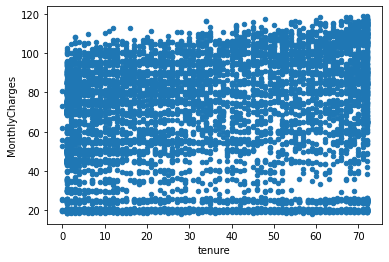

In [ ]:
df.plot.scatter(x='tenure', y='MonthlyCharges')

Its hard to find the corr of tenure and monthly charges

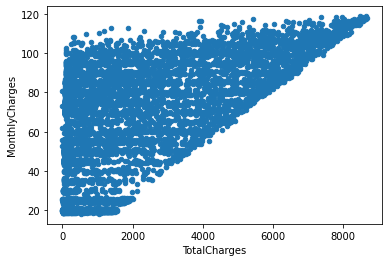

In [ ]:
df.plot.scatter(x='TotalCharges', y='MonthlyCharges')

As TotalCharges increase I got that MonthlyCharges minimum number is increase too

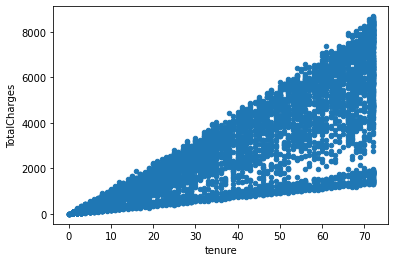

In [ ]:
df.plot.scatter(x='tenure', y='TotalCharges')

There is positive correltion but to wide to predict the number just using the plot

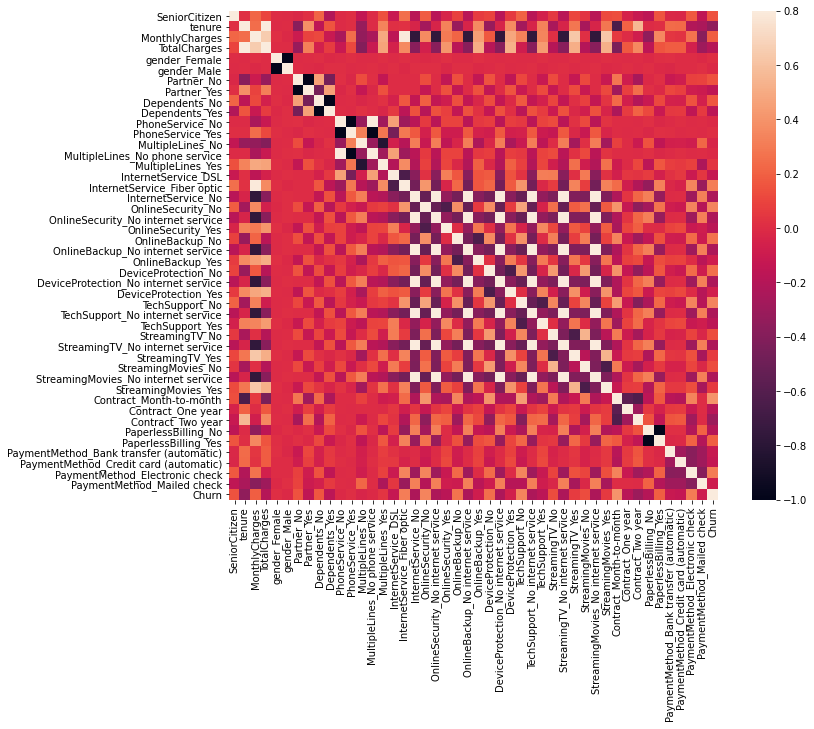

In [ ]:

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Machine Learning Logistic Regression

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='Churn')
y=df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Normalize the data

In [ ]:
s=StandardScaler()
x_train_s=s.fit_transform(x_train)

In [ ]:
x_test_s=s.transform(x_test)

### Using loop to find the result with some parameters

In [ ]:
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for x in solver:
  for c in [0.001,0.01,0.1,1]:
    LR=LogisticRegression(solver=x,C=c,random_state=1)
    LR=LR.fit(x_train_s, y_train)
    yhat=LR.predict(x_test_s)
    scores=accuracy_score(y_test, yhat)
    print('With Solver = {} and C ={} resulting {} in score'.format(x,c,scores))


With Solver = newton-cg and C =0.001 resulting 0.7952688172043011 in score
With Solver = newton-cg and C =0.01 resulting 0.8129032258064516 in score
With Solver = newton-cg and C =0.1 resulting 0.8167741935483871 in score
With Solver = newton-cg and C =1 resulting 0.8163440860215053 in score
With Solver = lbfgs and C =0.001 resulting 0.7952688172043011 in score
With Solver = lbfgs and C =0.01 resulting 0.8129032258064516 in score
With Solver = lbfgs and C =0.1 resulting 0.8167741935483871 in score
With Solver = lbfgs and C =1 resulting 0.8163440860215053 in score
With Solver = liblinear and C =0.001 resulting 0.7909677419354839 in score
With Solver = liblinear and C =0.01 resulting 0.8094623655913978 in score
With Solver = liblinear and C =0.1 resulting 0.8163440860215053 in score
With Solver = liblinear and C =1 resulting 0.8163440860215053 in score
With Solver = sag and C =0.001 resulting 0.7952688172043011 in score
With Solver = sag and C =0.01 resulting 0.8129032258064516 in score


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Now Trying using GridSearchCV to find the best optimum Parameter

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
pipe = Pipeline(steps=[ 
    ('LR', LogisticRegression())])
param_grid = {
    'LR__C': [0.001,0.01,0.1,1],
    'LR__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
LR_GC=LR_GC.fit(x_train_s,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
LR_GC.best_estimator_

Pipeline(memory=None,
         steps=[('LR',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
LR_GC.best_score_

0.8001289609432571

In [ ]:
yhat=LR_GC.predict(x_test_s)

In [ ]:
scores=accuracy_score(y_test, yhat)
scores

0.8163440860215053

Using Loop the best score is 0.81677 while using grid resulting in 0.8163
In this part using manual loop give the best result. But Machine Learning has no exact answer as we keep tuning the parameter to find the best optimum parameter

# Deep Learning

Using Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
x_train_s.shape

(4718, 45)

### Create A model with 1 Layer (Non Deep Learning)

Using 12 Node with sigmoid activation and learning rate of .003 and 100 runs

In [ ]:
model_1=Sequential()
model_1.add(Dense(12,input_shape=(45,),activation='sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [ ]:
model_1.compile(SGD(lr=.003),'binary_crossentropy',metrics=['accuracy'])

In [ ]:
run_hist_1=model_1.fit(x_train_s,y_train,validation_data=(x_test_s,y_test),epochs=100)

Epoch 1/100
148/148 [==============================] - 1s 3ms/step - loss: 0.8480 - accuracy: 0.3115 - val_loss: 0.7444 - val_accuracy: 0.4684
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.7197 - accuracy: 0.5204 - val_loss: 0.6701 - val_accuracy: 0.6512
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6792 - val_loss: 0.6287 - val_accuracy: 0.7058
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7257 - val_loss: 0.6019 - val_accuracy: 0.7243
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7404 - val_loss: 0.5822 - val_accuracy: 0.7282
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7480 - val_loss: 0.5665 - val_accuracy: 0.7295
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7340 - val_loss: 0.5533 - val_accuracy: 0.7295

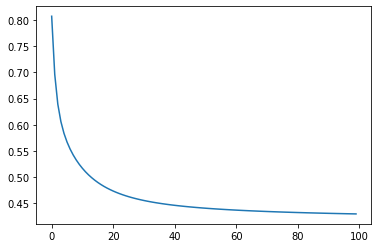

In [ ]:
fig,ax=plt.subplots()
ax.plot(run_hist_1.history['loss'])

The loss number is still decreasing and can use more runs, but the change is not significant

In [ ]:
y_pred=model_1.predict_classes(x_test_s)
score=accuracy_score(y_test,y_pred)
print(score)

0.8047311827956989


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The Score is 0.8047

### Non Deep Learning with 6 Node

In [ ]:
model_2=Sequential()
model_2.add(Dense(6,input_shape=(45,),activation='sigmoid'))
model_2.add(Dense(1,activation='sigmoid'))
model_2.compile(SGD(lr=.003),'binary_crossentropy',metrics=['accuracy'])
run_hist_2=model_2.fit(x_train_s,y_train,validation_data=(x_test_s,y_test),epochs=100)

Epoch 1/100
148/148 [==============================] - 1s 4ms/step - loss: 0.6238 - accuracy: 0.7040 - val_loss: 0.6045 - val_accuracy: 0.7273
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7306 - val_loss: 0.5819 - val_accuracy: 0.7325
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.7346 - val_loss: 0.5654 - val_accuracy: 0.7312
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7342 - val_loss: 0.5524 - val_accuracy: 0.7312
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7304 - val_loss: 0.5419 - val_accuracy: 0.7299
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7377 - val_loss: 0.5329 - val_accuracy: 0.7303
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7323 - val_loss: 0.5250 - val_accuracy: 0.7299

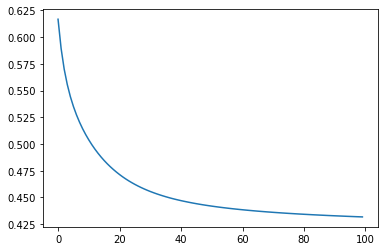

In [ ]:
fig,ax=plt.subplots()
ax.plot(run_hist_2.history['loss'])

In [ ]:
y_pred=model_2.predict_classes(x_test_s)
score=accuracy_score(y_test,y_pred)
print(score)

0.8047311827956989


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The result is 0.8047

### Now using 3 layer

In [ ]:
model_3=Sequential()
model_3.add(Dense(6,input_shape=(45,),activation='sigmoid'))
model_3.add(Dense(6,input_shape=(45,),activation='sigmoid'))
model_3.add(Dense(6,input_shape=(45,),activation='sigmoid'))
model_3.add(Dense(1,activation='sigmoid'))
model_3.compile(SGD(lr=.003),'binary_crossentropy',metrics=['accuracy'])
run_hist_3=model_3.fit(x_train_s,y_train,validation_data=(x_test_s,y_test),epochs=100)

Epoch 1/100
148/148 [==============================] - 1s 3ms/step - loss: 0.7825 - accuracy: 0.2685 - val_loss: 0.7081 - val_accuracy: 0.2701
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4871 - val_loss: 0.6517 - val_accuracy: 0.7299
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7346 - val_loss: 0.6217 - val_accuracy: 0.7299
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.7349 - val_loss: 0.6051 - val_accuracy: 0.7299
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7355 - val_loss: 0.5960 - val_accuracy: 0.7299
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7402 - val_loss: 0.5908 - val_accuracy: 0.7299
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5844 - accuracy: 0.7374 - val_loss: 0.5878 - val_accuracy: 0.7299

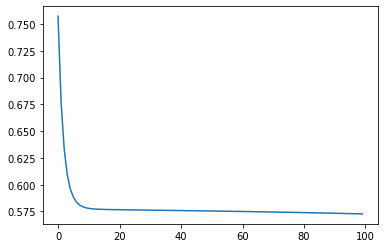

In [ ]:
fig,ax=plt.subplots()
ax.plot(run_hist_3.history['loss'])

In [ ]:
y_pred=model_3.predict_classes(x_test_s)
score=accuracy_score(y_test,y_pred)
print(score)

0.7298924731182795


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The Score is 0.7298

In [ ]:
model_4=Sequential()
model_4.add(Dense(15,input_shape=(45,),activation='sigmoid'))
model_4.add(Dense(15,input_shape=(45,),activation='sigmoid'))
model_4.add(Dense(1,activation='sigmoid'))
model_4.compile(SGD(lr=.003),'binary_crossentropy',metrics=['accuracy'])
run_hist_4=model_4.fit(x_train_s,y_train,validation_data=(x_test_s,y_test),epochs=100)

Epoch 1/100
148/148 [==============================] - 1s 4ms/step - loss: 0.7135 - accuracy: 0.3829 - val_loss: 0.6473 - val_accuracy: 0.7299
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7313 - val_loss: 0.6133 - val_accuracy: 0.7299
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7419 - val_loss: 0.6006 - val_accuracy: 0.7299
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7484 - val_loss: 0.5954 - val_accuracy: 0.7299
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7349 - val_loss: 0.5927 - val_accuracy: 0.7299
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7280 - val_loss: 0.5910 - val_accuracy: 0.7299
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.7343 - val_loss: 0.5898 - val_accuracy: 0.7299

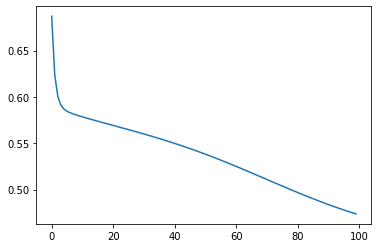

In [ ]:
fig,ax=plt.subplots()
ax.plot(run_hist_4.history['loss'])

In [ ]:
y_pred=model_4.predict_classes(x_test_s)
score=accuracy_score(y_test,y_pred)
print(score)

0.7298924731182795


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
model_5=Sequential()
model_5.add(Dense(15,input_shape=(45,),activation='sigmoid'))
model_5.add(Dense(15,input_shape=(45,),activation='sigmoid'))
model_5.add(Dense(1,activation='sigmoid'))
model_5.compile(SGD(lr=1),'binary_crossentropy',metrics=['accuracy'])
run_hist_5=model_5.fit(x_train_s,y_train,validation_data=(x_test_s,y_test),epochs=100)

Epoch 1/100
148/148 [==============================] - 1s 3ms/step - loss: 0.5128 - accuracy: 0.7540 - val_loss: 0.4394 - val_accuracy: 0.7824
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7806 - val_loss: 0.4202 - val_accuracy: 0.8073
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7895 - val_loss: 0.4314 - val_accuracy: 0.7910
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.7907 - val_loss: 0.4179 - val_accuracy: 0.8047
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7862 - val_loss: 0.4112 - val_accuracy: 0.8073
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.7935 - val_loss: 0.4163 - val_accuracy: 0.8073
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.7978 - val_loss: 0.4324 - val_accuracy: 0.7931

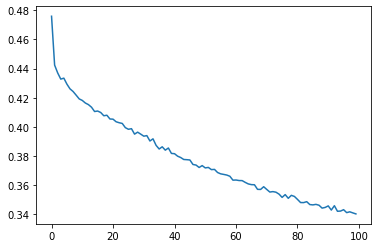

In [ ]:
fig,ax=plt.subplots()
ax.plot(run_hist_5.history['loss'])

In [ ]:
y_pred=model_5.predict_classes(x_test_s)
score=accuracy_score(y_test,y_pred)
print(score)

0.7582795698924731


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
model_6=Sequential()
model_6.add(Dense(8,input_shape=(45,),activation='relu'))
model_6.add(Dense(8,input_shape=(45,),activation='relu'))
model_6.add(Dense(1,activation='sigmoid'))
model_6.compile(SGD(lr=1),'binary_crossentropy',metrics=['accuracy'])
run_hist_6=model_6.fit(x_train_s,y_train,validation_data=(x_test_s,y_test),epochs=100)

Epoch 1/100
148/148 [==============================] - 1s 3ms/step - loss: 0.4838 - accuracy: 0.7604 - val_loss: 0.4374 - val_accuracy: 0.7708
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.7831 - val_loss: 0.4196 - val_accuracy: 0.8039
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.7776 - val_loss: 0.4266 - val_accuracy: 0.7970
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7789 - val_loss: 0.4856 - val_accuracy: 0.7299
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.7729 - val_loss: 0.4194 - val_accuracy: 0.8056
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.7896 - val_loss: 0.4235 - val_accuracy: 0.8095
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7954 - val_loss: 0.4321 - val_accuracy: 0.8103

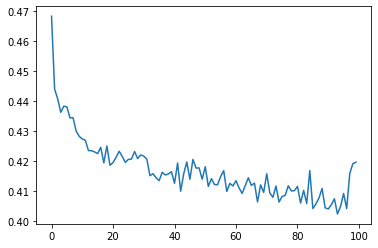

In [ ]:
fig,ax=plt.subplots()
ax.plot(run_hist_6.history['loss'])

In [ ]:
y_pred=model_6.predict_classes(x_test_s)
score=accuracy_score(y_test,y_pred)
print(score)

0.781505376344086


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Using loop to Try different parameter for deep learning

Using 2 layer but with different learn rate and units to find the best result

In [ ]:
from sklearn.metrics import accuracy_score
Units=[]
C=[]
Activations=[]
Score=[]
for x in [2,4,8,16,32]:
  for y in [.001,.01,.1,1]:
    for z in ['sigmoid','relu']:
      model=Sequential()
      model.add(Dense(x,input_shape=(45,),activation=z))
      model.add(Dense(x,activation=z))
      model.add(Dense(1,activation='sigmoid'))
      model.compile(SGD(lr=y),'binary_crossentropy',metrics=['accuracy'])
      run_hist=model.fit(x_train_s,y_train,validation_data=(x_test_s,y_test),epochs=100)
      y_pred=model.predict_classes(x_test_s)
      score=accuracy_score(y_test,y_pred)
      Units.append(x)
      C.append(y)
      Activations.append(z)
      Score.append(score)

Epoch 1/100
148/148 [==============================] - 1s 3ms/step - loss: 0.8971 - accuracy: 0.2622 - val_loss: 0.8661 - val_accuracy: 0.2701
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.2658 - val_loss: 0.8359 - val_accuracy: 0.2701
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.8298 - accuracy: 0.2681 - val_loss: 0.8088 - val_accuracy: 0.2701
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.8019 - accuracy: 0.2707 - val_loss: 0.7847 - val_accuracy: 0.2701
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.7860 - accuracy: 0.2511 - val_loss: 0.7631 - val_accuracy: 0.2701
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.2672 - val_loss: 0.7438 - val_accuracy: 0.2701
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.7397 - accuracy: 0.2666 - val_loss: 0.7265 - val_accuracy: 0.2701

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Streaming output truncated to the last 5000 lines.
Epoch 1/100
148/148 [==============================] - 1s 3ms/step - loss: 0.5495 - accuracy: 0.7375 - val_loss: 0.4672 - val_accuracy: 0.7729
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7679 - val_loss: 0.4394 - val_accuracy: 0.7931
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7691 - val_loss: 0.4379 - val_accuracy: 0.7811
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7742 - val_loss: 0.4352 - val_accuracy: 0.7884
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7676 - val_loss: 0.6123 - val_accuracy: 0.7609
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7850 - val_loss: 0.4407 - val_accuracy: 0.8056
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4373 - accurac

In [ ]:
Score = [round(x,3) for x in Score]
Result=pd.DataFrame([Units,C,Activations,Score]).T

Put the result in table

In [ ]:
Result.columns=['Units','LR','Activation','Accuracy Score']
Result

,Units,LR,Activation,Accuracy Score
0,2,0.001,sigmoid,0.73
1,2,0.001,relu,0.81
2,2,0.01,sigmoid,0.8
3,2,0.01,relu,0.79
4,2,0.1,sigmoid,0.81
5,2,0.1,relu,0.81
6,2,1,sigmoid,0.8
7,2,1,relu,0.73
8,4,0.001,sigmoid,0.73
9,4,0.001,relu,0.73


As using 32 Units with 0.001 Learning Rate and Sigmoid Activation I got 0.81489. Thats better than Logistic Regression.

As using Deep Learning is time consuming. Sometime using normal machine learning is better as its consume less time. With this 7000 row and using google collab it takes time about 1 hour to finish the the loop, While Using GridSearchCV only use 5 minutes.
I got increase of accuract with ~1.5%

I will try to use different tuning and change the number of layer to find the best result for this data. But as deep learning really takes time, I ve to be carefull when tunning and make it learn the data